# 🧾 Financial Audit Automation - EDA Notebook
This notebook performs exploratory data analysis (EDA) on the general ledger dataset.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for plots
sns.set(style='whitegrid')

Matplotlib is building the font cache; this may take a moment.


In [2]:
# Load the dataset
df = pd.read_excel('../data/sample_general_ledger.xlsx')
df.head()

,Date,Account,Description,Amount,User,EntryType
0,2024-01-01,Inventory,Invoice issued,8800.73,user1,Manual
1,2024-01-02,Expenses,Refund,2876.99,user2,Automated
2,2024-01-03,Accounts Receivable,Payment received,6331.46,user1,Automated
3,2024-01-04,Expenses,Payment received,7323.90,user2,Automated
4,2024-01-05,Expenses,Purchase,2219.21,user1,Automated


In [3]:
# Basic dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         202 non-null    datetime64[ns]
 1   Account      202 non-null    object        
 2   Description  202 non-null    object        
 3   Amount       202 non-null    float64       
 4   User         202 non-null    object        
 5   EntryType    202 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 9.6+ KB


In [4]:
# Summary statistics
df.describe()

,Date,Amount
count,202,202.000000
mean,2024-04-08 14:43:57.623762432,5046.649604
min,2024-01-01 00:00:00,-9999.000000
25%,2024-02-18 06:00:00,3009.357500
50%,2024-04-08 12:00:00,5068.270000
75%,2024-05-28 18:00:00,7055.077500
max,2024-07-18 00:00:00,11569.410000
std,NaN,3124.466012


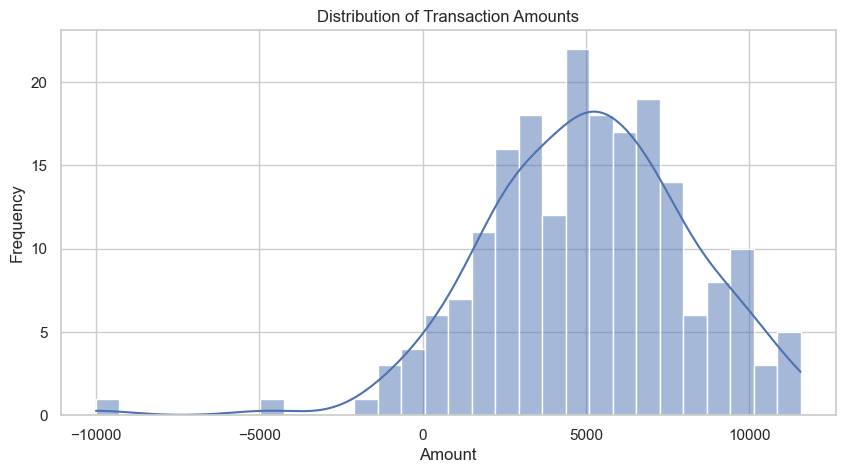

In [5]:
# Distribution of transaction amounts
plt.figure(figsize=(10, 5))
sns.histplot(df['Amount'], bins=30, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

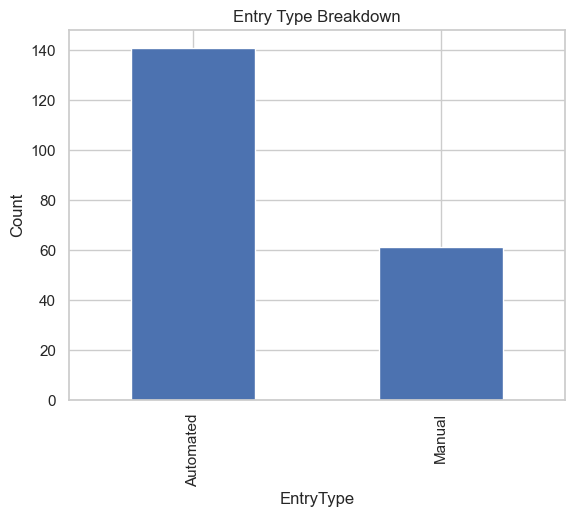

In [6]:
# Entry type breakdown
df['EntryType'].value_counts().plot(kind='bar', title='Entry Type Breakdown')
plt.ylabel('Count')
plt.show()

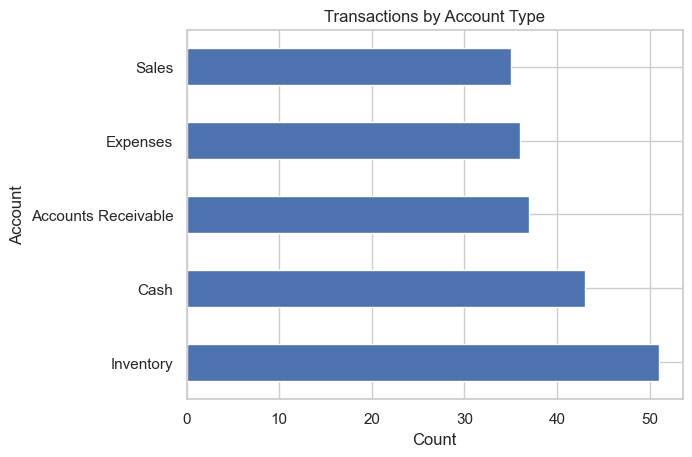

In [7]:
# Count by account type
df['Account'].value_counts().plot(kind='barh', title='Transactions by Account Type')
plt.xlabel('Count')
plt.show()

In [8]:
# Detect duplicates
df[df.duplicated()]

,Date,Account,Description,Amount,User,EntryType
200,2024-01-11,Inventory,Refund,9897.23,user1,Automated
201,2024-01-11,Inventory,Refund,9897.23,user1,Automated


In [9]:
# Detect large round values
threshold = 10000
df[(df['Amount'] % 1000 == 0) & (df['Amount'].abs() >= threshold)]

,Date,Account,Description,Amount,User,EntryType
5,2024-01-06,Sales,Refund,10000.0,user1,Automated


In [10]:
# Detect suspiciously small values
limit = 5000
df[df['Amount'].abs() < limit]

,Date,Account,Description,Amount,User,EntryType
1,2024-01-02,Expenses,Refund,2876.99,user2,Automated
4,2024-01-05,Expenses,Purchase,2219.21,user1,Automated
6,2024-01-07,Accounts Receivable,Misc,-4723.80,user1,Automated
7,2024-01-08,Accounts Receivable,Refund,1926.84,user2,Automated
8,2024-01-09,Accounts Receivable,Purchase,4242.30,user2,Automated
...,...,...,...,...,...,...
193,2024-07-12,Sales,Payment received,1822.36,user1,Automated
194,2024-07-13,Inventory,Misc,4811.96,user3,Automated
196,2024-07-15,Accounts Receivable,Misc,2042.82,user1,Manual
198,2024-07-17,Expenses,Purchase,3409.23,user2,Automated


----
This notebook complements the Python script and provides visual insights into transaction anomalies for audit purposes.